In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

In [4]:
df_data = pd.read_csv('../../data/LUNG_Filtered_barplot.csv')
df_data.head()

,drug,cell_line,prediction,OncotreeCode,IC50
0,5-Fluorouracil,HCC827,5.472933,LUAD,5.191741
1,ABT737,HCC827,2.832198,LUAD,4.389625
2,AGI-5198,HCC827,5.063128,LUAD,5.698307
3,AGI-6780,HCC827,4.925839,LUAD,5.258638
4,AGK2,HCC827,3.713538,LUAD,4.342128


In [5]:
# 按照drug分组，计算每组IC50与prediction的皮尔逊相关系数
df_data.groupby('drug')[['IC50', 'prediction']].apply(lambda x: x['IC50'].corr(x['prediction']))

drug
5-Fluorouracil    0.620341
ABT737            0.863617
AGI-5198          0.450877
AGI-6780          0.492010
AGK2              0.097129
                    ...   
WZ4003            0.475473
Wnt-C59           0.188918
XAV939            0.227186
YK-4-279          0.282731
ZM447439          0.549995
Length: 144, dtype: float64

In [6]:
drugs_corr = df_data.groupby('drug')[['IC50', 'prediction']].apply(lambda x: x['IC50'].corr(x['prediction']))
drugs_corr = drugs_corr.reset_index()
drugs_corr.columns = ['drug', 'corr']
drugs_corr.head()

,drug,corr
0,5-Fluorouracil,0.620341
1,ABT737,0.863617
2,AGI-5198,0.450877
3,AGI-6780,0.492010
4,AGK2,0.097129


In [7]:
# 画图：按照相关系数排序，画出每个drug的相关系数，从大到小，前15个使用红色，其他用蓝色
drugs_corr = drugs_corr.sort_values(by='corr', ascending=False)
# 重置索引
drugs_corr = drugs_corr.reset_index(drop=True)

In [11]:
drugs_corr['color'] = 'lime'
drugs_corr.loc[drugs_corr.index < 10, 'color'] = 'red'

drugs_corr.head()

,drug,corr,color
0,Oxaliplatin,0.892126,red
1,ABT737,0.863617,red
2,Axitinib,0.820856,red
3,Navitoclax,0.811593,red
4,Picolinici-acid,0.807400,red


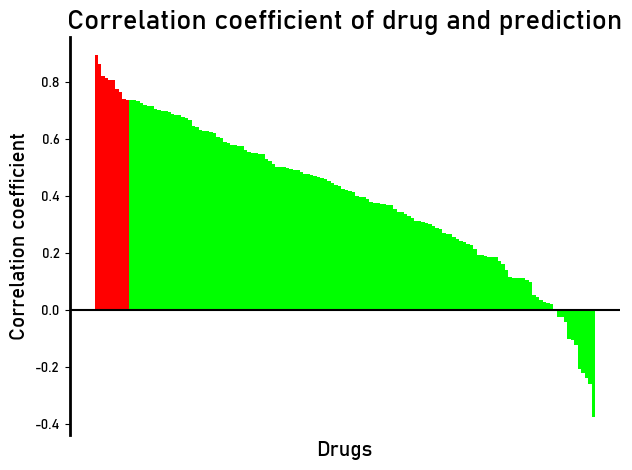

In [29]:
# 画图
# plt.figure(figsize=(10, 6))
plt.bar(x=drugs_corr.index, height=drugs_corr['corr'], color=drugs_corr['color'],width=1)
# 画一条Y=0的线
plt.axhline(y=0, color='black', linestyle='-')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取消X轴展示
plt.xticks([])
# 规定Y轴范围
# plt.ylim(-0.1, 0.9)
# plt.xticks(drugs_corr.index, drugs_corr['drug'], rotation=90)
plt.xlabel('Drugs', fontsize=15)

plt.ylabel('Correlation coefficient', fontsize=15)
plt.title('Correlation coefficient of drug and prediction', fontsize=20)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
ax.spines['left'].set_linewidth(2)  # Y轴线宽

plt.tight_layout()
plt.savefig('LUNG_all.png', dpi=300)
plt.show()

In [14]:
# 取前10个数据
drugs_corr_top10 = drugs_corr.loc[drugs_corr.index < 10, :]
drugs_corr_top10.head()

,drug,corr,color
0,Oxaliplatin,0.892126,red
1,ABT737,0.863617,red
2,Axitinib,0.820856,red
3,Navitoclax,0.811593,red
4,Picolinici-acid,0.807400,red


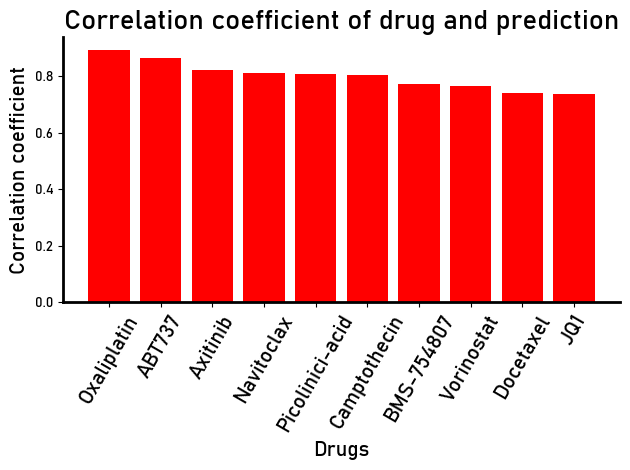

In [28]:

# plt.figure(figsize=(10, 6))
plt.bar(x=drugs_corr_top10['drug'], height=drugs_corr_top10['corr'], color=drugs_corr_top10['color'])
# X轴 旋转45度
plt.xticks(drugs_corr_top10['drug'], rotation=60, fontsize=15)
# 规定Y轴范围
# plt.ylim(-0.1, 0.9)
# plt.xticks(drugs_corr.index, drugs_corr['drug'], rotation=90)
plt.xlabel('Drugs', fontsize=15)

plt.ylabel('Correlation coefficient', fontsize=15)
plt.title('Correlation coefficient of drug and prediction', fontsize=20)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)  # X轴线宽
ax.spines['left'].set_linewidth(2)  # Y轴线宽

plt.tight_layout()
plt.savefig('LUNG_top10.png', dpi=300)

plt.show()